# Support Vector Regression (SVR) Model Evaluation For Predicting Atmospheric EmissionS

# Objectives:

In [1]:
# Import necessary libraries

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
from sklearn.svm import SVR

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
import matplotlib.pyplot as plt

In [7]:
import joblib

In [8]:
# Define the path to the saved model and test data

In [9]:
MODEL_SAVE_PATH = '../../models/svr_pipeline_model.pkl'
TEST_DATA_PATH = '../../data/processed/test_data.csv'

In [10]:
# Load the test data

In [11]:
test_data = pd.read_csv(TEST_DATA_PATH)

In [12]:
# Define the target columns (pollutants)

In [13]:
TARGET_COLUMNS = [ 'nox', 'pm10', 'pm2.5', 'so2']

In [14]:
# Separate the features (x_test) and target (y_test)

In [15]:
x_test = test_data.drop (columns=TARGET_COLUMNS)
y_test = test_data[TARGET_COLUMNS]

In [16]:
# Load the saved svr pipeline mode

In [17]:
loaded_pipeline = joblib.load(MODEL_SAVE_PATH)

# Make the predictions using the loaded pipeline.

In [18]:
print("Model Loaded Successfully.")

Model Loaded Successfully.


In [19]:
svr_predictions = loaded_pipeline.predict(x_test)

In [20]:
# Convert the prediction to dataframe for easier comparison and analysis

In [21]:
svr_predictions_df = pd.DataFrame(svr_predictions, columns = TARGET_COLUMNS)

In [22]:
# Print the first five lines of predicted values

In [23]:
svr_predictions_df.head()

,nox,pm10,pm2.5,so2
0,-0.236529,-0.294920,-0.405206,0.0
1,0.048192,0.283272,0.629433,0.0
2,-0.237491,-0.295292,-0.409888,0.0
3,0.181403,0.586356,0.944545,0.0
4,-0.236405,-0.295044,-0.404937,0.0


# Evaluate The Model Performance

# - Mean Squared Error (MSE)
# - R- Squared

In [24]:
# Calculate the Mean Squared Error and R Squared for each pollutant

In [25]:
mse = mean_squared_error(y_test, svr_predictions)
r2 = r2_score(y_test, svr_predictions)

In [26]:
# Print the evaluation metrics

In [27]:
print(f"Mean Squared Error (MSE) : {mse} ")
print (f" R-Squared (R2) : {r2} ")

Mean Squared Error (MSE) : 0.8829494164203728 
 R-Squared (R2) : 0.133470901236239 


In [28]:
# Evaluate Each Pollutant Separatetly

In [29]:
for pollutant in TARGET_COLUMNS:
    mse_pollutant = mean_squared_error(y_test[pollutant], svr_predictions_df[pollutant])
    r2_pollutant = r2_score(y_test[pollutant], svr_predictions_df[pollutant])
    print(f"\nPollutant:{pollutant}")
    print(f" Mean Squared Error (MSE): {mse_pollutant}")
    print(f" R-Squared (R2): {r2_pollutant}")


Pollutant:nox
 Mean Squared Error (MSE): 1.0142928604723698
 R-Squared (R2): 0.056807712930452614

Pollutant:pm10
 Mean Squared Error (MSE): 1.7926151719012833
 R-Squared (R2): -0.8075073736726037

Pollutant:pm2.5
 Mean Squared Error (MSE): 0.7248896333078384
 R-Squared (R2): 0.2845832656871071

Pollutant:so2
 Mean Squared Error (MSE): 0.0
 R-Squared (R2): 1.0


# Visualizing Predictions vs Actual Values of the Pollutant

In [30]:
# Plot actual vs predicted values for each pollutant

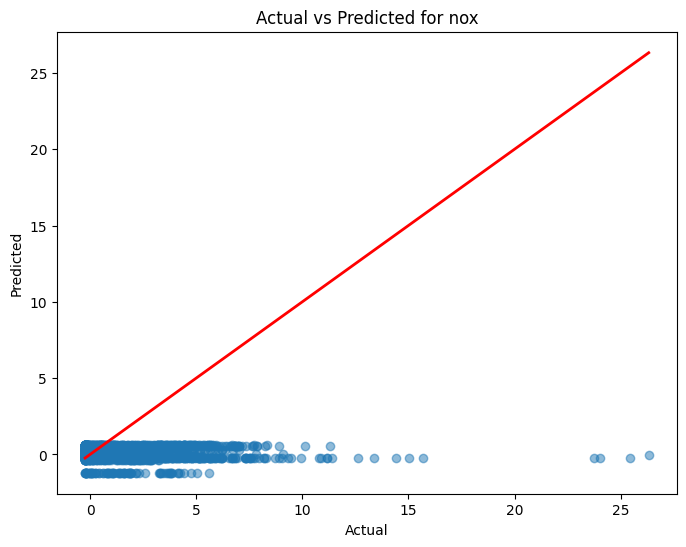

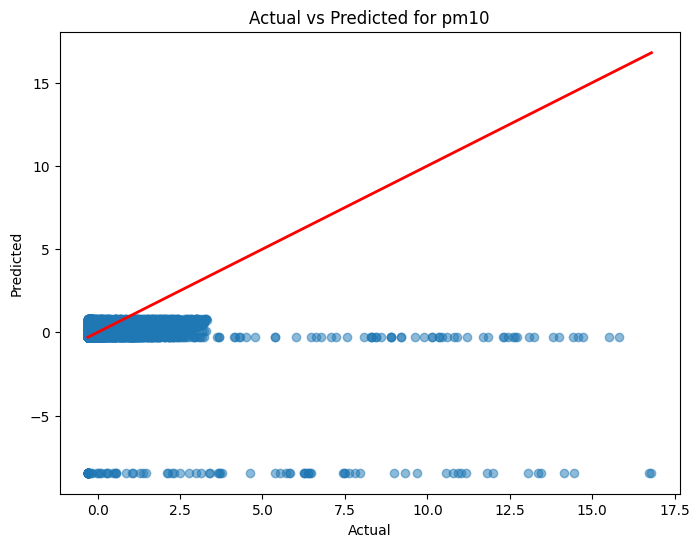

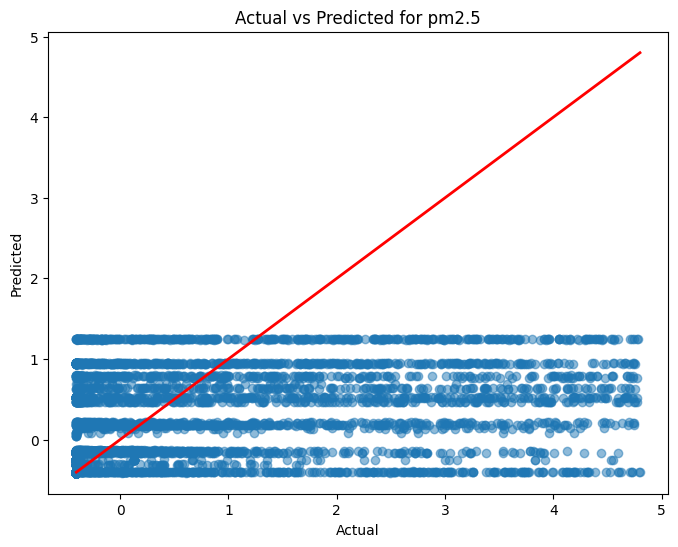

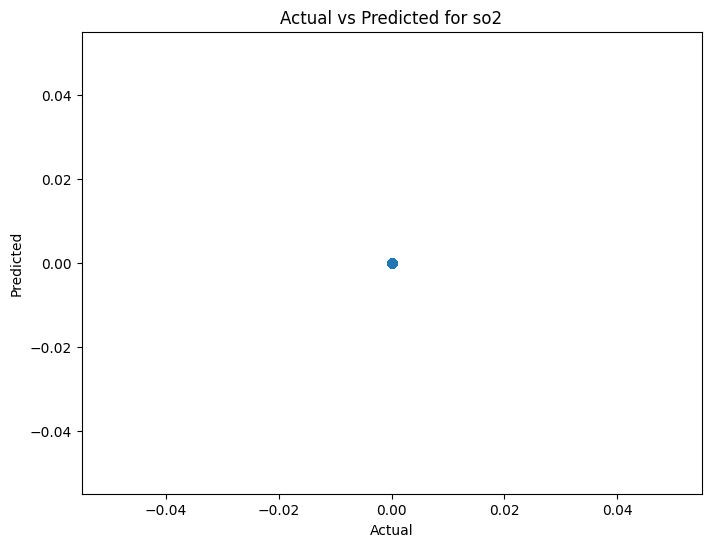

In [31]:
for pollutant in TARGET_COLUMNS:
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test[pollutant], svr_predictions_df[pollutant], alpha=0.5)
    plt.plot([y_test[pollutant].min(), y_test[pollutant].max()],
             [y_test[pollutant].min(), y_test[pollutant].max()], color = 'red', linewidth=2)
    plt.title(f"Actual vs Predicted for {pollutant}")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()